## A SCRIPT TO ACCESS ONEPETRO AND SEARCH KEYWORDS

### A script retrieves diciplines statistics for a given search for Onepetro website

In [267]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import seaborn as sns

In [274]:
def onepetroKeyWordParsing(URL):
    """The function accesses sidebar for given search and compiles a dataframe with disciplines and number of corresponding papers"""
    
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
    }
    
    # Getting the first order left-box tags
    page = requests.get(URL, headers = headers)
    soup_1 = BeautifulSoup(page.content, "html.parser")
    results = soup_1.find_all('div', attrs = {"data-facet-field-name":'FacetCategoryIDs_1'})
    field_tag = (results[0].contents[3])
    
    subject = []
    count = []

    # Getting tags for disciplines and paper counts
    for child in field_tag.descendants: 
        try:
            if child['class'][0] == 'checkbox-label':
                s = child['for'].strip('subjects--').split('-chk-')
                n = s[1].split('-')
                n1 = int(n[0])
                n2 = int(n[1])

                if n1 != 0 and n2 != 0:
                    subject.append(s[0])


                    for child_2 in child.descendants:
                        if child_2.name =='span':
                            n = int(child_2.string.strip('(').strip(')'))
                            count.append(n) 
        except TypeError:
            pass
        except KeyError:
            pass

    #Buid a dataframe, tiny adjustments to naming
    data = {'Subject':subject, 'Count':count}
    df = pd.DataFrame(data)
    df.sort_values(by = 'Count', ascending = False, inplace= True)

    return df

Text(0, 0.5, 'Y-Axis')

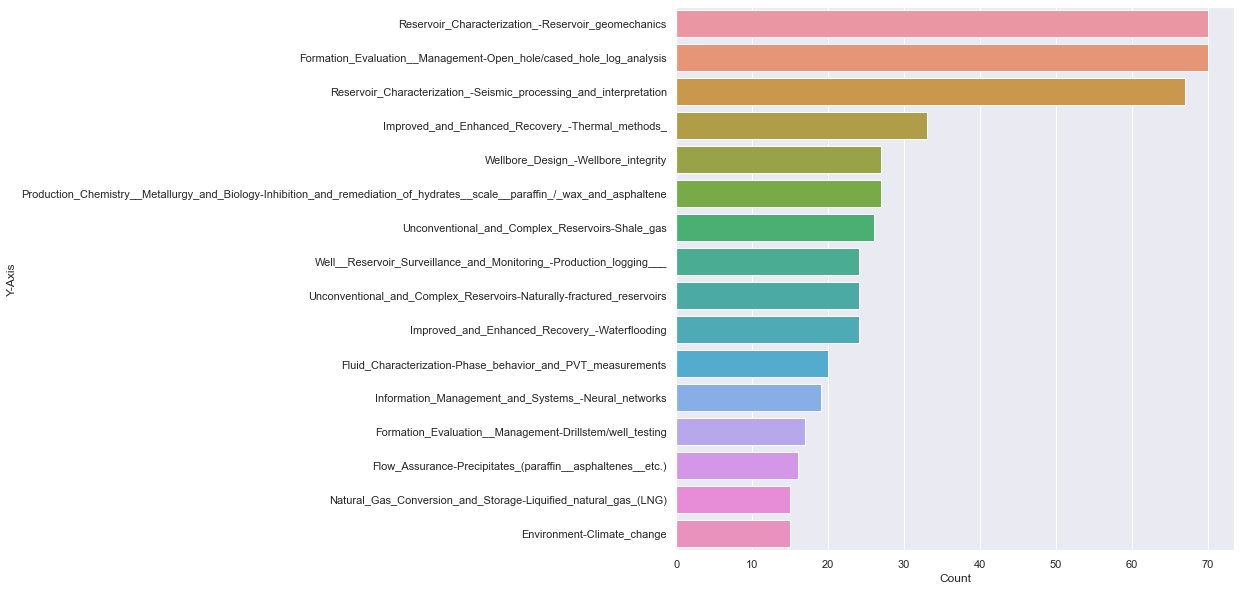

In [275]:
URL = 'https://onepetro.org/search-results?q=iran&sort=Date+-+Newest+First&fl_SiteID=1&qb=%7b%22q%22%3a%22iran%22%7d&rg_PublicationDate=01/01/2017%20TO%2001/01/2022'

df = onepetroKeyWordParsing(URL)


#Getting Top-15
df_f = df.copy(deep = True)
df_f.reset_index(inplace = True, drop = True)
df_n = df_f.loc[0:15]
df_n.head(20)

#Plotting
p = sns.barplot(x = df_n['Count'], y = df_n['Subject'])
#sns.set(rc={'figure.figsize':(10,10)})
p.set_ylabel("Y-Axis", fontsize = 12)